In [400]:
import numpy as np
import pandas as pd
from shapely.geometry import Point,MultiPolygon
from shapely.ops import transform
import geopandas as gpd
from tqdm import tqdm
import shapely.wkt
from pyproj import Geod
import folium
%

UsageError: Line magic function `%` not found.


In [ ]:
parks = pd.read_csv('data/OpenData_ParksProperties.csv')
parks.head()

In [401]:
locs = pd.read_csv('data/temp2.csv')
locs.head()

,Latitude,Longitude,num_build500,mean_fa_ratio
0,40.646738,-73.951234,31,1.179760
1,40.646877,-73.946154,17,0.865508
2,40.647370,-73.945400,18,0.748947
3,40.647410,-73.948200,30,0.815587
4,40.647446,-73.951205,25,1.060397


In [402]:
def get_gdf(locs):
    df = gpd.GeoDataFrame({'geometry': locs}, crs='EPSG:4326')
    df = df.to_crs('EPSG:32662')
    return df

In [403]:
geometry = parks.the_geom.apply(lambda x: shapely.wkt.loads(x))
geometry = geometry.apply(lambda x: transform(flip, x))

In [404]:
parks_geom = get_gdf(geometry)
locs_geom = get_gdf([Point(row['Latitude'],row['Longitude']) for _,row in locs.iterrows()])

In [405]:
min_distance_park = []
for i,_ in tqdm(locs_geom.iterrows(),total=locs_geom.shape[0]):
    out = parks_geom.geometry.distance(locs_geom.iloc[[i]*parks_geom.shape[0]].reset_index(0).drop(columns='index'),align=False)
    min_distance_park.append(min(out))


100%|██████████| 435/435 [00:39<00:00, 11.04it/s]


In [406]:
locs['min_distance_park'] = min_distance_park

In [407]:
locs.to_csv('data/temp3.csv',index=False)

In [408]:
flip

<function __main__.flip(x, y)>

In [163]:
map_nyc = folium.Map( crs='EPSG3857',zoom_start=12, 
tiles='cartodbpositron', width=800, height=800)
for _,row in locs.iterrows():
    folium.CircleMarker(location=(row['Latitude'], row['Longitude']),radius=1).add_to(map_nyc)
    
for _,row in locs.iterrows():
    folium.CircleMarker(location=(row['Latitude'], row['Longitude']),radius=1).add_to(map_nyc)
    
for g in geometry:
    center = g.centroid
    folium.CircleMarker(location=(center.x, center.y),color='#32a852',radius=1).add_to(map_nyc)
map_nyc

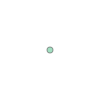

In [159]:
geometry[0].centroid